# Machine learning zoomcamp: Midterm project - Wine quality

## First look at data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('wine+quality/winequality-white.csv', sep=';')
len(df)

4898

In [4]:
df.columns = df.columns.str.replace(' ', '-').str.lower()
df.head()

,fixed-acidity,volatile-acidity,citric-acid,residual-sugar,chlorides,free-sulfur-dioxide,total-sulfur-dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,fixed-acidity,volatile-acidity,citric-acid,residual-sugar,chlorides,free-sulfur-dioxide,total-sulfur-dioxide,density,ph,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed-acidity         4898 non-null   float64
 1   volatile-acidity      4898 non-null   float64
 2   citric-acid           4898 non-null   float64
 3   residual-sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free-sulfur-dioxide   4898 non-null   float64
 6   total-sulfur-dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   ph                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## EDA

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

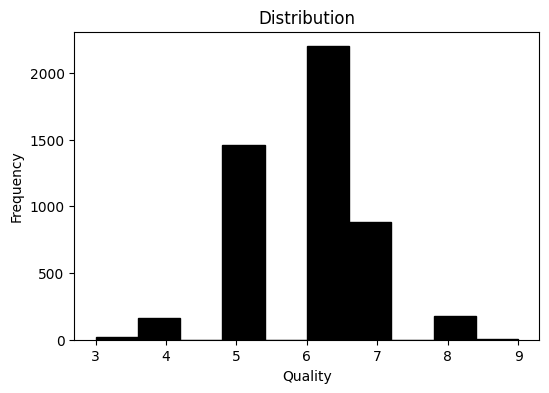

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df['quality'], bins=10, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Quality')
plt.title('Distribution')

plt.show()

In [9]:
round(df.corr(),3)

,fixed-acidity,volatile-acidity,citric-acid,residual-sugar,chlorides,free-sulfur-dioxide,total-sulfur-dioxide,density,ph,sulphates,alcohol,quality
fixed-acidity,1.000,-0.023,0.289,0.089,0.023,-0.049,0.091,0.265,-0.426,-0.017,-0.121,-0.114
volatile-acidity,-0.023,1.000,-0.149,0.064,0.071,-0.097,0.089,0.027,-0.032,-0.036,0.068,-0.195
citric-acid,0.289,-0.149,1.000,0.094,0.114,0.094,0.121,0.150,-0.164,0.062,-0.076,-0.009
residual-sugar,0.089,0.064,0.094,1.000,0.089,0.299,0.401,0.839,-0.194,-0.027,-0.451,-0.098
chlorides,0.023,0.071,0.114,0.089,1.000,0.101,0.199,0.257,-0.090,0.017,-0.360,-0.210
free-sulfur-dioxide,-0.049,-0.097,0.094,0.299,0.101,1.000,0.616,0.294,-0.001,0.059,-0.250,0.008
total-sulfur-dioxide,0.091,0.089,0.121,0.401,0.199,0.616,1.000,0.530,0.002,0.135,-0.449,-0.175
density,0.265,0.027,0.150,0.839,0.257,0.294,0.530,1.000,-0.094,0.074,-0.780,-0.307
ph,-0.426,-0.032,-0.164,-0.194,-0.090,-0.001,0.002,-0.094,1.000,0.156,0.121,0.099
sulphates,-0.017,-0.036,0.062,-0.027,0.017,0.059,0.135,0.074,0.156,1.000,-0.017,0.054


In [10]:
# residual sugar and density are highly correlated with each other, 
# so, we can remove one of them
del df['residual-sugar']

## Try linear regression models

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.quality.values
y_val = df_val.quality.values
y_test = df_test.quality.values

del df_train['quality']
del df_val['quality']
del df_test['quality']

In [13]:
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, root_mean_squared_error

### Simple linear regression

In [54]:
y_train_pred_dumb = [y_train.mean()]*len(y_train)
round(root_mean_squared_error(y_train, y_train_pred_dumb), 3)

np.float64(0.894)

Baseline MRSE: 0.894

In [15]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [22]:
model_lr.intercept_, model_lr.coef_

(np.float64(-34.04320946360774),
 array([-9.69571799e-02, -1.97631331e+00, -2.04424529e-02, -1.02094875e+00,
         7.63303421e-03, -8.28896055e-04,  3.68903119e+01,  1.96344367e-02,
         4.52072823e-01,  3.86788557e-01]))

In [17]:
y_val_pred = model_lr.predict(X_val)

In [55]:
root_mean_squared_error(y_val, y_val_pred)

np.float64(0.7003020723248672)

### Ridge (l2 normamlization)

In [24]:
def round_(x):
    return float(round(x, 3))

In [56]:
alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
for a in alpha:
    model_ridge = Ridge(alpha = a, random_state = 42)
    model_ridge.fit(X_train, y_train)
    y_val_pred = model_ridge.predict(X_val)
    print(a, '\t', round_(root_mean_squared_error(y_val, y_val_pred)))
    print(round_(model_ridge.intercept_), list(map(round_, model_ridge.coef_)), '\n')

0.001 	 0.737
-29.518 [-0.094, -1.968, -0.017, -1.048, 0.008, -0.001, 32.368, 0.026, 0.455, 0.379] 

0.005 	 0.738
-18.864 [-0.087, -1.95, -0.01, -1.11, 0.008, -0.001, 21.718, 0.04, 0.463, 0.361] 

0.01 	 0.74
-12.534 [-0.083, -1.939, -0.006, -1.143, 0.008, -0.001, 15.39, 0.048, 0.468, 0.35] 

0.05 	 0.742
-1.767 [-0.076, -1.918, 0.001, -1.17, 0.008, -0.0, 4.622, 0.063, 0.476, 0.332] 

0.1 	 0.743
0.381 [-0.074, -1.912, 0.002, -1.137, 0.008, -0.0, 2.467, 0.067, 0.477, 0.329] 

0.5 	 0.744
2.279 [-0.072, -1.885, 0.0, -0.879, 0.008, -0.0, 0.523, 0.074, 0.475, 0.327] 

1 	 0.744
2.501 [-0.072, -1.855, 0.001, -0.683, 0.008, -0.0, 0.263, 0.078, 0.47, 0.327] 

5 	 0.744
2.592 [-0.069, -1.634, 0.019, -0.257, 0.008, -0.001, 0.051, 0.094, 0.438, 0.327] 

10 	 0.745
2.561 [-0.068, -1.42, 0.037, -0.151, 0.009, -0.001, 0.025, 0.103, 0.402, 0.325] 



In [104]:
model_ridge = Ridge(alpha = 0.05, random_state = 42)
model_ridge.fit(X_train, y_train)
y_val_pred = model_ridge.predict(X_val)
print(round_(root_mean_squared_error(y_val, y_val_pred)))
print(round_(model_ridge.intercept_), list(map(round_, model_ridge.coef_)))

0.742
-1.767 [-0.076, -1.918, 0.001, -1.17, 0.008, -0.0, 4.622, 0.063, 0.476, 0.332]


In [20]:
df_train.columns

Index(['fixed-acidity', 'volatile-acidity', 'citric-acid', 'chlorides',
       'free-sulfur-dioxide', 'total-sulfur-dioxide', 'density', 'ph',
       'sulphates', 'alcohol'],
      dtype='object')

The best alpha is 0 but has large w0 and cooficient for density seems to large

### Lasso

In [57]:
alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
for a in alpha:
    model_lasso = Lasso(alpha = a, random_state = 42)
    model_lasso.fit(X_train, y_train)
    y_val_pred = model_lasso.predict(X_val)
    print(a, '\t', round_(root_mean_squared_error(y_val, y_val_pred)))
    print(round_(model_lasso.intercept_), list(map(round_, model_lasso.coef_)), '\n')

0.001 	 0.744
2.823 [-0.072, -1.833, -0.0, -0.0, 0.008, -0.0, 0.0, 0.045, 0.414, 0.331] 

0.005 	 0.744
3.037 [-0.069, -1.44, 0.0, -0.0, 0.008, -0.001, 0.0, 0.0, 0.141, 0.326] 

0.01 	 0.749
3.014 [-0.06, -0.923, 0.0, -0.0, 0.009, -0.001, 0.0, 0.0, 0.0, 0.317] 

0.05 	 0.766
2.869 [-0.001, -0.0, 0.0, -0.0, 0.011, -0.002, -0.0, 0.0, 0.0, 0.278] 

0.1 	 0.771
3.364 [-0.0, -0.0, 0.0, -0.0, 0.011, -0.003, -0.0, 0.0, 0.0, 0.237] 

0.5 	 0.844
6.255 [-0.0, -0.0, 0.0, -0.0, 0.008, -0.005, -0.0, 0.0, 0.0, 0.0] 

1 	 0.846
6.222 [-0.0, -0.0, 0.0, -0.0, 0.005, -0.004, -0.0, 0.0, 0.0, 0.0] 

5 	 0.863
5.92 [-0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0] 

10 	 0.866
5.865 [-0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0] 



In [103]:
model_lasso = Lasso(alpha =0.001, random_state = 42)
model_lasso.fit(X_train, y_train)
y_val_pred = model_lasso.predict(X_val)
print(round_(root_mean_squared_error(y_val, y_val_pred)))
print(round_(model_lasso.intercept_), list(map(round_, model_lasso.coef_)), '\n')

0.744
2.823 [-0.072, -1.833, -0.0, -0.0, 0.008, -0.0, 0.0, 0.045, 0.414, 0.331] 



Lasso model performs much worse

## Decision tree based models

### Simple decision tree model

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [83]:
model_tree = DecisionTreeRegressor(max_depth=1, random_state=42)
model_tree.fit(X_train, y_train)
y_val_pred = model_tree.predict(X_val)
print(round_(root_mean_squared_error(y_val, y_val_pred)))


0.78


In [84]:
print(export_text(model_tree, feature_names = list(df_train.columns)))

|--- alcohol <= 10.85
|   |--- value: [5.60]
|--- alcohol >  10.85
|   |--- value: [6.32]



In [85]:
max_depth = [1, 2, 4, 8, 16, 32]
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64, 128]
scores = []
for d in max_depth:
    for s in min_samples_leaf:
        model_tree = DecisionTreeRegressor(min_samples_leaf=s, max_depth= d, random_state=42)
        model_tree.fit(X_train, y_train)
        y_val_pred = model_tree.predict(X_val)
        scores.append((d, s, round(root_mean_squared_error(y_val, y_val_pred), 3)))
        # print('d:', d, '\ts:', s, '\t', round_(mean_squared_error(y_val, y_val_pred)))

scores = sorted(scores, key = lambda x: x[2])
for s in scores[:10]:
    print(s)

(8, 64, np.float64(0.709))
(16, 64, np.float64(0.709))
(32, 64, np.float64(0.709))
(4, 64, np.float64(0.711))
(4, 32, np.float64(0.715))
(4, 4, np.float64(0.717))
(4, 8, np.float64(0.717))
(4, 16, np.float64(0.718))
(8, 128, np.float64(0.718))
(16, 128, np.float64(0.718))


In [105]:
model_tree = DecisionTreeRegressor(min_samples_leaf=64, max_depth= 8, random_state=42)
model_tree.fit(X_train, y_train)
y_val_pred = model_tree.predict(X_val)
print(round(root_mean_squared_error(y_val, y_val_pred), 3))

0.709


### Random forest model

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
model_rf = RandomForestRegressor(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)
y_val_pred = model_rf.predict(X_val)
round(root_mean_squared_error(y_val, y_val_pred), 3)

np.float64(0.635)

In [88]:
n_estimators = [40, 50, 70, 80, 100]
max_depth = [4, 8, 16, 32]
min_samples_leaf = [4, 8, 16, 32]
scores = []
for n in n_estimators:
    for d in max_depth:
        for s in min_samples_leaf:
            model_rf = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_leaf=s, random_state=42)
            model_rf.fit(X_train, y_train)
            y_val_pred = model_rf.predict(X_val)
            scores.append((n, d, s, round(root_mean_squared_error(y_val, y_val_pred), 3)))
            # print('n:', n, '\td:', d, '\ts:', s, '\t', round_(mean_squared_error(y_val, y_val_pred)))

In [89]:
scores = sorted(scores, key = lambda x: x[3])
for s in scores[:10]:
    print(s)

(50, 32, 4, np.float64(0.613))
(70, 32, 4, np.float64(0.613))
(80, 32, 4, np.float64(0.613))
(50, 16, 4, np.float64(0.614))
(70, 16, 4, np.float64(0.614))
(80, 16, 4, np.float64(0.614))
(100, 32, 4, np.float64(0.614))
(100, 16, 4, np.float64(0.615))
(40, 16, 4, np.float64(0.616))
(40, 32, 4, np.float64(0.616))


(50, 32, 4, np.float64(0.613)) - the best option so far, but I prefer
(50, 16, 4, np.float64(0.614)) because it is just a bit worse but has two times less depth

In [106]:
model_rf = RandomForestRegressor(n_estimators=50, max_depth=16, min_samples_leaf=4, random_state=42)
model_rf.fit(X_train, y_train)
y_val_pred = model_rf.predict(X_val)
print(round(root_mean_squared_error(y_val, y_val_pred), 3))

0.614


In [90]:
sorted(list(zip(model_rf.feature_importances_, df_train.columns)), key = lambda x: x[0], reverse = True)

[(np.float64(0.45653224329871545), 'alcohol'),
 (np.float64(0.16827643755676594), 'volatile-acidity'),
 (np.float64(0.14096129353661244), 'free-sulfur-dioxide'),
 (np.float64(0.0427618434485219), 'ph'),
 (np.float64(0.042373104961224456), 'fixed-acidity'),
 (np.float64(0.03393125716932025), 'sulphates'),
 (np.float64(0.03385973513022274), 'chlorides'),
 (np.float64(0.031309236727149824), 'density'),
 (np.float64(0.026894840516532435), 'citric-acid'),
 (np.float64(0.023100007654934553), 'total-sulfur-dioxide')]

### XGBoost

In [91]:
import xgboost as xgb

In [92]:
features = list(df_train.columns)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [99]:
xgb_params = {
    'eta': 0.5, 
    'max_depth': 16,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 42,
    'verbosity': 1,
}
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [100]:
y_val_pred = model_xgb.predict(dval)
round(root_mean_squared_error(y_val, y_val_pred), 3)

np.float64(0.678)

XGB couldn't show comparable accuracy

## Check models on test set

In [109]:
y_test_pred_lr = model_lr.predict(X_test)
y_test_pred_ridge = model_ridge.predict(X_test)
y_test_pred_lasso = model_lasso.predict(X_test)
y_test_pred_tree = model_tree.predict(X_test)
y_test_pred_rf = model_rf.predict(X_test)
dtest = xgb.DMatrix(X_test, feature_names=features)
y_test_pred_xgb = model_xgb.predict(dtest)

print('Linear\t', round(root_mean_squared_error(y_test, y_test_pred_lr), 3))
print('Ridge\t', round(root_mean_squared_error(y_test, y_test_pred_ridge), 3))
print('Lasso\t', round(root_mean_squared_error(y_test, y_test_pred_lasso), 3))
print('Tree\t', round(root_mean_squared_error(y_test, y_test_pred_tree), 3))
print('RF\t', round(root_mean_squared_error(y_test, y_test_pred_rf), 3))
print('XGB\t', round(root_mean_squared_error(y_test, y_test_pred_xgb), 3))

Linear	 0.773
Ridge	 0.776
Lasso	 0.777
Tree	 0.74
RF	 0.643
XGB	 0.676


### Winner

Random forest model with n_estimators = 50, max_depth = 16, min_samples_leaf = 4